In [2]:
import numpy as np
import pandas as pd

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [3]:
print(df_can.columns)



Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')


### Add a total column 

In [5]:
df_can['Total']=df_can.iloc[:,9:].sum(axis=1)



### Drop TYPE and COVERAGE columns

In [6]:
 df_can=df_can.drop(['Type','Coverage'], axis=1)

### Rename OdName as country and make it an index 

In [7]:
df_can=df_can.set_index(['OdName'])
df_can=df_can.rename_axis(['Country'])

### Draw an area plot

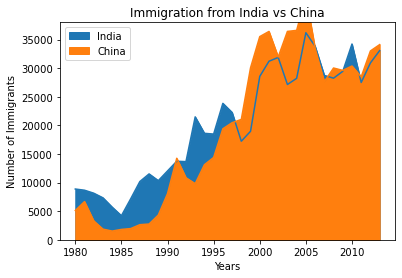

In [8]:
from matplotlib import pyplot as plt

years=list(df_can.iloc[:, 6:-1].columns)
df_can.loc['India', years].plot(kind = 'area')
df_can.loc['China', years].plot(kind = 'area')

plt.title('Immigration from India vs China')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.legend()

plt.show()

### Find the top 5 countries and plot

In [9]:
df_can.sort_values(by='Total',ascending=False, inplace=True)
df_can.head()

,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,8147,7338,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,3308,1863,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,908,Europe,924,Northern Europe,901,Developed regions,22045,24796,20620,10015,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,5921,5249,4562,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,935,Asia,5501,Southern Asia,902,Developing regions,978,972,1201,900,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200


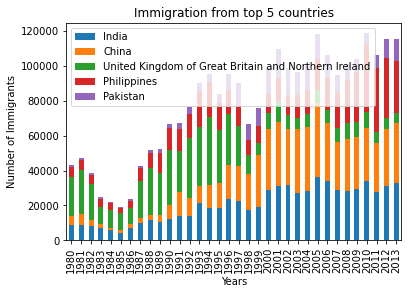

In [75]:
top_5_countries=list(df_can[0:5].index)

df_can.loc[top_5_countries, years].transpose().plot(kind='bar',stacked=True)

plt.title('Immigration from top 5 countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.legend()
plt.show()